# 2018-04-01-minfile-analysis-datestamps

## April 1, 2018

In [32]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 1000

In [33]:
%matplotlib inline
import mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [34]:
import warnings
warnings.filterwarnings("ignore")

# 1 BC Minfile Analysis

## 1.0.1 Load and clean the data

<https://catalogue.data.gov.bc.ca/dataset/assessment-report-index-system-aris-database/resource/3f46ab30-77e3-4a92-a010-f73bf4f913a3>

In [35]:
df = pd.read_csv('../data/ariasdata.csv', encoding='latin')

In [36]:
pd.read_csv('../data/arismetadata.csv')[['Name','Description']]

,Name,Description
0,rep_no,Assessment Report Number
1,cnf_prd,Confidential Period
2,aff_dt,Affidavit Date
3,gwrk_typs,General Work Codes
4,claim_val,Claim Value
5,title,Title of Report
6,rep_yr,Report Year
7,wrk_yr,Work Year
8,conf_ldate,no data
9,conf_adate,Date Off Confidental


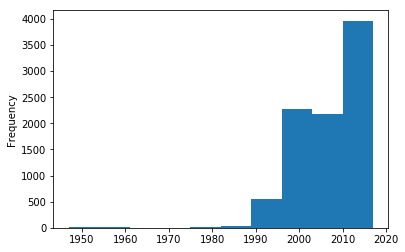

In [37]:
df[~df.com_nms.isnull()].wrk_yr.plot.hist()

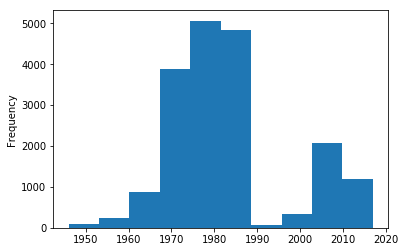

In [38]:
df[df.com_nms.isnull()].wrk_yr.plot.hist()

In [39]:
df.head(1).T

,0
rep_no,1
cnf_prd,1
aff_dt,01-01-1947
gwrk_typs,GEOL:
claim_val,0
title,Geological Report on the Moyie Groups 1-6 and the ML 55 Claim
rep_yr,1947
wrk_yr,1947
conf_ldate,NaN
conf_adate,1948-01-01


In [40]:
df.isnull().sum() / len(df) * 100

rep_no             0.000000
cnf_prd            0.454064
aff_dt             0.000000
gwrk_typs          0.000000
claim_val          0.000000
title             10.560477
rep_yr             0.000000
wrk_yr            22.856427
conf_ldate       100.000000
conf_adate         0.454064
aff_ndate        100.000000
aff_adate          0.000000
page_ct            0.000000
prpty_nm          10.566048
nts_maps           0.000000
bcgs_maps          0.000000
lat83_deg          0.000000
lat83_min          0.000000
lat83_sec          0.000000
lon83_deg          0.000000
lon83_min          0.000000
lon83_sec          0.000000
zone83             0.000000
north83            0.000000
east83             0.000000
lat83              0.000000
long83             0.000000
com_cds           58.226085
camp_cd           74.338403
geo_sum           75.539027
reg_geo           35.598083
info_cls          12.591231
mdiv_cds           0.005571
mdiv_nmx           0.005571
mdiv_nms           0.005571
claim_nmx          0

In [41]:
col_subset = ['rep_no', 'rep_yr', 'lat83', 'long83']
col_com = 'com_nms'

In [42]:
mask = (~df[col_com].isnull())
df_min = pd.DataFrame(
[cols+[comm] for cols, comms in
zip(df[mask][col_subset].values.tolist(), df[mask][col_com].str.split(', ').values.tolist())
for comm in comms],
columns=col_subset+[col_com])

In [43]:
df_min = df_min.rename(columns={'com_nms': 'commodity'})

In [44]:
df_min.rep_yr = df_min.rep_yr.astype(int)

In [45]:
(df_min.rep_yr < 1900).sum()

1

In [46]:
df_min = df_min[df_min.rep_yr > 1900]

In [47]:
df_min.head()

,rep_no,rep_yr,lat83,long83,commodity
0,1.0,1947,49.293333,-115.811111,Silver
1,1.0,1947,49.293333,-115.811111,Gold
2,49.0,1950,50.486667,-119.119444,Mica
3,60.0,1951,50.661667,-120.496389,Copper
4,69.0,1951,51.331667,-119.926111,Zinc


In [48]:
# rep no is a unique ID
len(df) - df.com_nms.isnull().sum(), len(df_min.rep_no.unique())

(14994, 14993)

# 1.0.2 Analysis

## Minerals in the dataset

In [49]:
df_min.commodity.value_counts(ascending=False).head(50)

Gold                      11134
Copper                     7672
Silver                     6656
Zinc                       4284
Lead                       3717
Molybdenum/Molybdenite     1453
Platinum                    312
Nickel                      309
Tungsten                    225
Palladium                   220
Iron                        197
Limestone                   183
Cobalt                      173
Barium/Barite               147
Arsenic                     144
Antimony                    133
Rare Earths                 107
Cadmium                      84
Chromium/Chromite            70
Niobium/Columbium            69
Diamond                      67
Dimension Stone              63
Uranium                      60
Magnesite                    60
Jade/Nephrite                60
Silica                       54
Phosphate                    54
Mercury                      53
Bismuth                      53
Graphite                     51
Rhenium                      42
Marble  

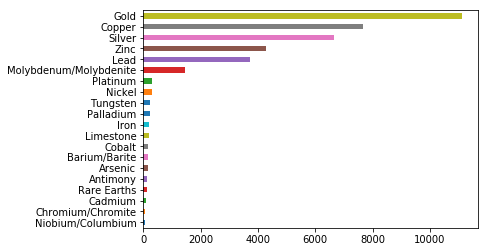

In [50]:
df_min.commodity.value_counts(ascending=False).head(20)[::-1].plot.barh()

**Average number of minerals per site**

In [51]:
df_min.columns

Index(['rep_no', 'rep_yr', 'lat83', 'long83', 'commodity'], dtype='object')

In [52]:
df_min.groupby('rep_no').commodity.size().mean()

2.590809044220636

**Depth distribution**

In [53]:
df_min.elevation.hist(bins=50, label='All minerals')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'elevation'

In [ ]:
df_min[df_min.commodity=='Gold'].elevation.hist(bins=50, label='Gold')
plt.legend()

## 1.0.3 Map plots

In [ ]:
def plot_map(df_min, commodity='', quality='l'):
    if commodity:
        longs = list(df_min[df_min.commodity == commodity].long83)
        latts = list(df_min[df_min.commodity == commodity].lat83)
    else:
        longs = list(df_min.long83)
        latts = list(df_min.lat83)
        
    # plot the blank world map
    my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
        resolution = quality, area_thresh = 5000.0,
        llcrnrlon=min(longs), llcrnrlat=min(latts),
        urcrnrlon=max(longs), urcrnrlat=max(latts))

    # set resolution='h' for high quality
    # draw elements onto the world map
    my_map.drawcountries()
    #my_map.drawstates()
    my_map.drawcoastlines(antialiased=False,
        linewidth=0.005)
    # add coordinates as red dots
    x, y = my_map(longs, latts)
    my_map.plot(x, y, 'ro', markersize=0.5, alpha=0.5)
    plt.show()

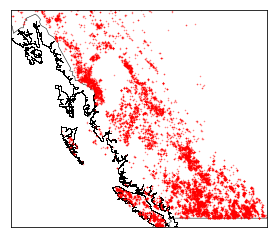

In [54]:
plot_map(df_min.groupby('rep_no').head(1))

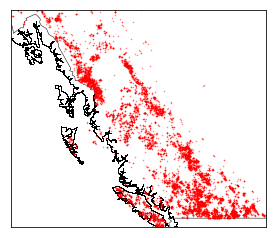

In [55]:
plot_map(df_min, 'Gold')

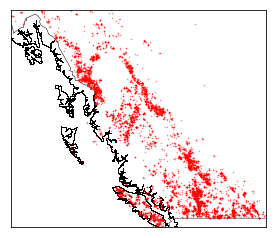

In [56]:
plot_map(df_min, 'Copper')

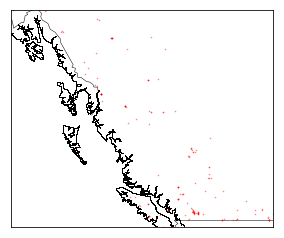

In [57]:
plot_map(df_min, 'Cobalt')

**1.0.4 Depoits by discovery date**

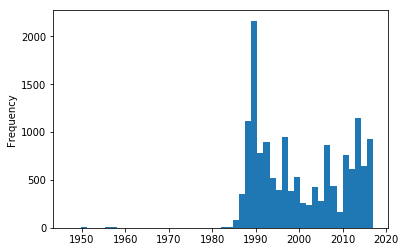

In [58]:
df_min.groupby('rep_no').head(1).rep_yr.plot.hist(50)

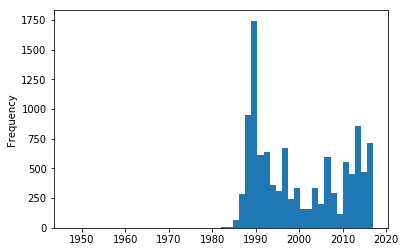

In [59]:
df_min[df_min.commodity == 'Gold'].rep_yr.plot.hist(50)

In [60]:
gold = df_min[df_min.commodity == 'Gold']
len(gold)

11134

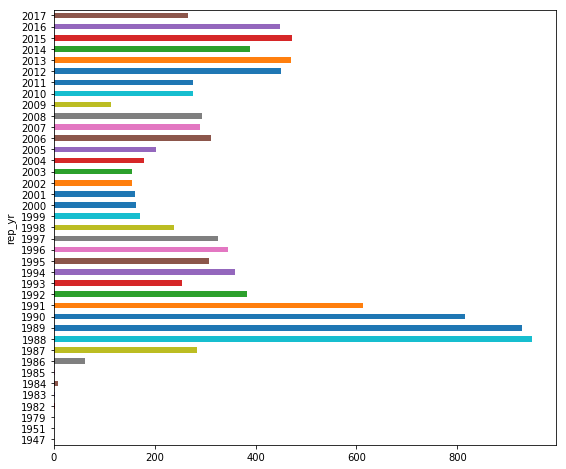

In [61]:
fig = plt.figure(figsize=(9, 8))
gold.groupby('rep_yr').size().plot.barh()

In [62]:
gold = df_min[df_min.commodity == 'Cobalt']
len(gold)

173

## 1.0.3 Load and clean MINFile Minerals

In [79]:
mf_minerals = pd.read_csv('../data/MINFILE_Minerals.csv', encoding='latin')

In [80]:
mf_minerals.head()

,MINERAL_FILE_NUMBER,MINFILE_NAME1,MINFILE_NAME2,SYSTEM_STATUS_CODE,SYSTEM_STATUS_DESCRIPTION,STATUS_CODE,STATUS_DESCRIPTION,LATITUDE_DEGREES,LATITUDE_MINUTES,LATITUDE_SECONDS,LATITUDE_HEMISPHERE,DECIMAL_LATITUDE,LONGITUDE_DEGREES,LONGITUDE_MINUTES,LONGITUDE_SECONDS,LONGITUDE_HEMISPHERE,DECIMAL_LONGITUDE,UTM_ZONE,UTM_NORTHING,UTM_EASTING,DATUM_REFERENCE,ELEVATION,COMMODITY_CODE1,COMMODITY_CODE2,COMMODITY_CODE3,COMMODITY_CODE4,COMMODITY_CODE5,COMMODITY_CODE6,COMMODITY_CODE7,COMMODITY_CODE8,COMMODITY_DESCRIPTION1,COMMODITY_DESCRIPTION2,COMMODITY_DESCRIPTION3,COMMODITY_DESCRIPTION4,COMMODITY_DESCRIPTION5,COMMODITY_DESCRIPTION6,COMMODITY_DESCRIPTION7,COMMODITY_DESCRIPTION8,DEPOSIT_TYPE_CODE1,DEPOSIT_TYPE_CODE2,DEPOSIT_TYPE_DESCRIPTION1,DEPOSIT_TYPE_DESCRIPTION2,DEPOSIT_CHARACTER_CODE1,DEPOSIT_CHARACTER_CODE2,DEPOSIT_CHARACTER_DESCRIPTION1,DEPOSIT_CHARACTER_DESCRIPTION2,DEPOSIT_CLASS_CODE1,DEPOSIT_CLASS_CODE2,DEPOSIT_CLASS_DESCRIPTION1,DEPOSIT_CLASS_DESCRIPTION2,TECTONIC_BELT_CODE,TECTONIC_BELT_DESCRIPTION,TERRANE_CODE,TERRANE_DESCRIPTION,NTS_MAPSHEET1,NTS_MAPSHEET2,BCGS_MAPSHEET1,BCGS_MAPSHEET2,REGION_CODE1,REGION_CODE2,REGION_CODE1_DESCRIPTION,REGION_CODE2_DESCRIPTION,URL,PRODUCTION_INDICATOR,RESERVES_INDICATOR
0,082ENE001,MCKINLEY,MCKINLEY (L.140S),0,Active,PAPR,Past Producer,49,32,27,N,49.540833,118,23,15,W,-118.387500,11,5488505,399620,NAD83,1190.0,CU,AG,PB,ZN,AU,NaN,NaN,NaN,Copper,Silver,Lead,Zinc,Gold,NaN,NaN,NaN,K01,K02,Cu skarn,Pb-Zn skarn,87,85.0,Massive,Disseminated,116,NaN,Skarn,NaN,OM,Omineca,QNH,Harper Ranch,082E09W,NaN,8200000000000000013148817247794919026587679925158503514112000.000000,NaN,BC,NaN,British Columbia,NaN,http://minfile.gov.bc.ca/Summary.aspx?minfilno=082ENE001,Y,N
1,082ENE002,BANNER,BANNER (L.1199),0,Active,SHOW,Showing,49,33,34,N,49.559444,118,22,50,W,-118.380556,11,5490565,400160,NAD83,1220.0,AU,AG,PB,ZN,CU,NaN,NaN,NaN,Gold,Silver,Lead,Zinc,Copper,NaN,NaN,NaN,I05,I01,Polymetallic veins Ag-Pb-Zn+/-Au,Au-quartz veins,79,82.0,Vein,Breccia,112,129.0,Hydrothermal,Epigenetic,OM,Omineca,JKT,Overlap Assemblage,082E09W,NaN,8200000000000000013148817247794919026587679925158503514112000.000000,NaN,BC,NaN,British Columbia,NaN,http://minfile.gov.bc.ca/Summary.aspx?minfilno=082ENE002,N,N
2,082ENE003,UNION,UNION (L.1022S),0,Active,PAPR,Past Producer,49,33,31,N,49.558611,118,21,18,W,-118.355000,11,5490439,402006,NAD83,1130.0,AG,AU,ZN,PB,CU,PT,PD,NaN,Silver,Gold,Zinc,Lead,Copper,Platinum,Palladium,NaN,I05,T01,Polymetallic veins Ag-Pb-Zn+/-Au,Tailings,79,82.0,Vein,Breccia,112,126.0,Hydrothermal,Replacement,OM,Omineca,QNH,Harper Ranch,082E09W,NaN,8200000000000000013148817247794919026587679925158503514112000.000000,NaN,BC,NaN,British Columbia,NaN,http://minfile.gov.bc.ca/Summary.aspx?minfilno=082ENE003,Y,Y
3,082ENE004,LITTLE,FRANKLIN CAMP,0,Active,SHOW,Showing,49,32,43,N,49.545278,118,20,9,W,-118.335833,11,5488932,403366,NAD83,1130.0,PB,ZN,NaN,NaN,NaN,NaN,NaN,NaN,Lead,Zinc,NaN,NaN,NaN,NaN,NaN,NaN,I05,NaN,Polymetallic veins Ag-Pb-Zn+/-Au,NaN,79,NaN,Vein,NaN,112,129.0,Hydrothermal,Epigenetic,OM,Omineca,QNH,Harper Ranch,082E09W,NaN,8200000000000000013148817247794919026587679925158503514112000.000000,NaN,BC,NaN,British Columbia,NaN,http://minfile.gov.bc.ca/Summary.aspx?minfilno=082ENE004,N,N
4,082ENE005,GLOUCESTER,GLOUCESTER (L.2809),0,Active,SHOW,Showing,49,34,38,N,49.577222,118,22,24,W,-118.373333,11,5492532,400718,NAD83,1280.0,AU,AG,CU,MO,ZN,PB,PT,NaN,Gold,Silver,Copper,Molybdenum,Zinc,Lead,Platinum,NaN,I05,NaN,Polymetallic veins Ag-Pb-Zn+/-Au,NaN,79,76.0,Vein,Shear,112,125.0,Hydrothermal,Igneous-contact,OM,Omineca,QNH,Harper Ranch,082E09W,NaN,8200000000000000013148817247794919026587679925158503514112000.000000,NaN,BC,NaN,British Columbia,NaN,http://minfile.gov.bc.ca/Summary.aspx?minfilno=082ENE005,N,N


In [81]:
# Transform the data set so that commodity codes and names are now in rows instead of columns
mf_minerals = pd.melt(mf_minerals, 
        id_vars=[x for x in mf_minerals.columns if 'COMMODITY_CODE' not in x], 
        value_vars=[x for x in mf_minerals.columns if 'COMMODITY_CODE' in x], 
        var_name="commodity_code_ph", value_name="commodity_code")

mf_minerals = pd.melt(mf_minerals, 
        id_vars=[x for x in mf_minerals.columns if 'COMMODITY_DESCRIPTION' not in x], 
        value_vars=[x for x in mf_minerals.columns if 'COMMODITY_DESCRIPTION' in x], 
        var_name="commodity_ph", value_name="commodity")

In [82]:
mf_minerals.head()

,MINERAL_FILE_NUMBER,MINFILE_NAME1,MINFILE_NAME2,SYSTEM_STATUS_CODE,SYSTEM_STATUS_DESCRIPTION,STATUS_CODE,STATUS_DESCRIPTION,LATITUDE_DEGREES,LATITUDE_MINUTES,LATITUDE_SECONDS,LATITUDE_HEMISPHERE,DECIMAL_LATITUDE,LONGITUDE_DEGREES,LONGITUDE_MINUTES,LONGITUDE_SECONDS,LONGITUDE_HEMISPHERE,DECIMAL_LONGITUDE,UTM_ZONE,UTM_NORTHING,UTM_EASTING,DATUM_REFERENCE,ELEVATION,DEPOSIT_TYPE_CODE1,DEPOSIT_TYPE_CODE2,DEPOSIT_TYPE_DESCRIPTION1,DEPOSIT_TYPE_DESCRIPTION2,DEPOSIT_CHARACTER_CODE1,DEPOSIT_CHARACTER_CODE2,DEPOSIT_CHARACTER_DESCRIPTION1,DEPOSIT_CHARACTER_DESCRIPTION2,DEPOSIT_CLASS_CODE1,DEPOSIT_CLASS_CODE2,DEPOSIT_CLASS_DESCRIPTION1,DEPOSIT_CLASS_DESCRIPTION2,TECTONIC_BELT_CODE,TECTONIC_BELT_DESCRIPTION,TERRANE_CODE,TERRANE_DESCRIPTION,NTS_MAPSHEET1,NTS_MAPSHEET2,BCGS_MAPSHEET1,BCGS_MAPSHEET2,REGION_CODE1,REGION_CODE2,REGION_CODE1_DESCRIPTION,REGION_CODE2_DESCRIPTION,URL,PRODUCTION_INDICATOR,RESERVES_INDICATOR,commodity_code_ph,commodity_code,commodity_ph,commodity
0,082ENE001,MCKINLEY,MCKINLEY (L.140S),0,Active,PAPR,Past Producer,49,32,27,N,49.540833,118,23,15,W,-118.387500,11,5488505,399620,NAD83,1190.0,K01,K02,Cu skarn,Pb-Zn skarn,87,85.0,Massive,Disseminated,116,NaN,Skarn,NaN,OM,Omineca,QNH,Harper Ranch,082E09W,NaN,8200000000000000013148817247794919026587679925158503514112000.000000,NaN,BC,NaN,British Columbia,NaN,http://minfile.gov.bc.ca/Summary.aspx?minfilno=082ENE001,Y,N,COMMODITY_CODE1,CU,COMMODITY_DESCRIPTION1,Copper
1,082ENE002,BANNER,BANNER (L.1199),0,Active,SHOW,Showing,49,33,34,N,49.559444,118,22,50,W,-118.380556,11,5490565,400160,NAD83,1220.0,I05,I01,Polymetallic veins Ag-Pb-Zn+/-Au,Au-quartz veins,79,82.0,Vein,Breccia,112,129.0,Hydrothermal,Epigenetic,OM,Omineca,JKT,Overlap Assemblage,082E09W,NaN,8200000000000000013148817247794919026587679925158503514112000.000000,NaN,BC,NaN,British Columbia,NaN,http://minfile.gov.bc.ca/Summary.aspx?minfilno=082ENE002,N,N,COMMODITY_CODE1,AU,COMMODITY_DESCRIPTION1,Gold
2,082ENE003,UNION,UNION (L.1022S),0,Active,PAPR,Past Producer,49,33,31,N,49.558611,118,21,18,W,-118.355000,11,5490439,402006,NAD83,1130.0,I05,T01,Polymetallic veins Ag-Pb-Zn+/-Au,Tailings,79,82.0,Vein,Breccia,112,126.0,Hydrothermal,Replacement,OM,Omineca,QNH,Harper Ranch,082E09W,NaN,8200000000000000013148817247794919026587679925158503514112000.000000,NaN,BC,NaN,British Columbia,NaN,http://minfile.gov.bc.ca/Summary.aspx?minfilno=082ENE003,Y,Y,COMMODITY_CODE1,AG,COMMODITY_DESCRIPTION1,Silver
3,082ENE004,LITTLE,FRANKLIN CAMP,0,Active,SHOW,Showing,49,32,43,N,49.545278,118,20,9,W,-118.335833,11,5488932,403366,NAD83,1130.0,I05,NaN,Polymetallic veins Ag-Pb-Zn+/-Au,NaN,79,NaN,Vein,NaN,112,129.0,Hydrothermal,Epigenetic,OM,Omineca,QNH,Harper Ranch,082E09W,NaN,8200000000000000013148817247794919026587679925158503514112000.000000,NaN,BC,NaN,British Columbia,NaN,http://minfile.gov.bc.ca/Summary.aspx?minfilno=082ENE004,N,N,COMMODITY_CODE1,PB,COMMODITY_DESCRIPTION1,Lead
4,082ENE005,GLOUCESTER,GLOUCESTER (L.2809),0,Active,SHOW,Showing,49,34,38,N,49.577222,118,22,24,W,-118.373333,11,5492532,400718,NAD83,1280.0,I05,NaN,Polymetallic veins Ag-Pb-Zn+/-Au,NaN,79,76.0,Vein,Shear,112,125.0,Hydrothermal,Igneous-contact,OM,Omineca,QNH,Harper Ranch,082E09W,NaN,8200000000000000013148817247794919026587679925158503514112000.000000,NaN,BC,NaN,British Columbia,NaN,http://minfile.gov.bc.ca/Summary.aspx?minfilno=082ENE005,N,N,COMMODITY_CODE1,AU,COMMODITY_DESCRIPTION1,Gold


In [83]:
mf_minerals = mf_minerals.rename(index=str, columns={
    "DECIMAL_LONGITUDE": "long83",
    "DECIMAL_LATITUDE": "lat83"
})

In [130]:
mf_minerals.commodity = mf_minerals.commodity.str.strip()

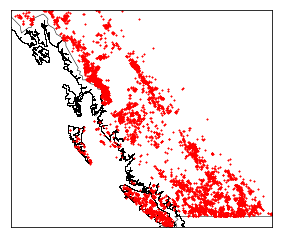

In [131]:
plot_map(mf_minerals, "Gold")

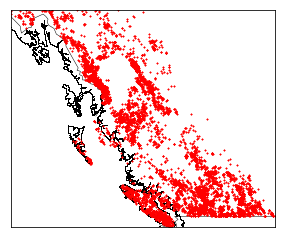

In [132]:
plot_map(mf_minerals, 'Copper')

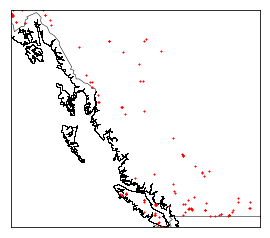

In [133]:
plot_map(mf_minerals, 'Cobalt')